In [1]:
import argparse
from dotmap import DotMap
import torch
import wandb
import hydra
import omegaconf
from hydra import compose, initialize

from src.common.train_utils import set_global_seeds
from src.dataset import *
from src.common.logger import WandbTrainerLogger
from src.models import *
from src.trainers import *




config_path = './configs'
config_name = 'unet_diffusion'

# Hydra
initialize(version_base='1.3', config_path=config_path) 
cfg = compose(config_name=config_name)
def eval_resolver(s: str):
    return eval(s)
omegaconf.OmegaConf.register_new_resolver("eval", eval_resolver)


set_global_seeds(cfg.seed)
device = torch.device(cfg.device)

train_loader = build_dataloader(cfg.dataset)

#logger = WandbTrainerLogger(cfg)

diffusion,unet = build_diffusion_unet(cfg.model)




Found cached dataset imagenet-1k (/home/shu/.cache/huggingface/datasets/imagenet-1k/default/1.0.0/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9)


  0%|          | 0/3 [00:00<?, ?it/s]

/home/shu/anaconda3/envs/diffusion/lib/python3.9/site-packages/datasets/table.py:1407: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [2]:
import numpy as np
from torchvision import transforms

reverse_transform = transforms.Compose([
     transforms.Lambda(lambda t: (t + 1) / 2),
     transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     transforms.Lambda(lambda t: t * 255.),
     transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
     transforms.ToPILImage(),
])

In [4]:
a = next(iter(train_loader))

torch.Size([8, 3, 256, 256])

In [12]:
t = torch.tensor([300])
image = a['pixel_values'][0]
noise_image = diffusion.get_noisy_image(image,t)

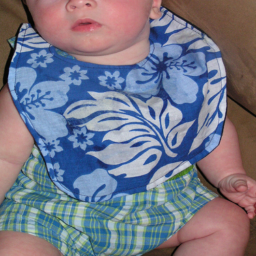

In [10]:
reverse_transform(image)

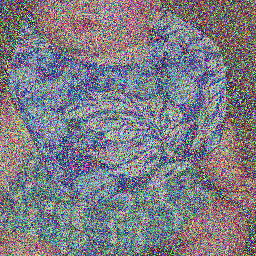

In [13]:
noise_image = reverse_transform(noise_image)
noise_image